<center><img alt="" src="images/Cover_EDA.jpg"/></center> 

## <center><font color="blue">EDA-04: Unsupervised Learning - Clustering Bagian ke-02</font></center>

<h2 style="text-align: center;">(C) Taufik Sutanto - 2020</h2>
<h2 style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id/eda-04/" target="_blank"><span style="color: #0009ff;">https://tau-data.id/eda-04/</span></a></h2>

In [ ]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt 
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import time, umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import cluster, datasets
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)
random_state = 99

# Review

## EDA-03
* Pendahuluan Unsupervised Learning
* k-Means, k-Means++, MiniBatch k-Means
* internal & External Evaluation
* Parameter Tunning

## EDA-04
* Hierarchical Clustering
* Spectral Clustering
* DBScan
* Clustering Evaluation Revisited

## Linkages Comparisons

* single linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.
* average and complete linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.
* Ward is the most effective method for noisy data.
* http://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

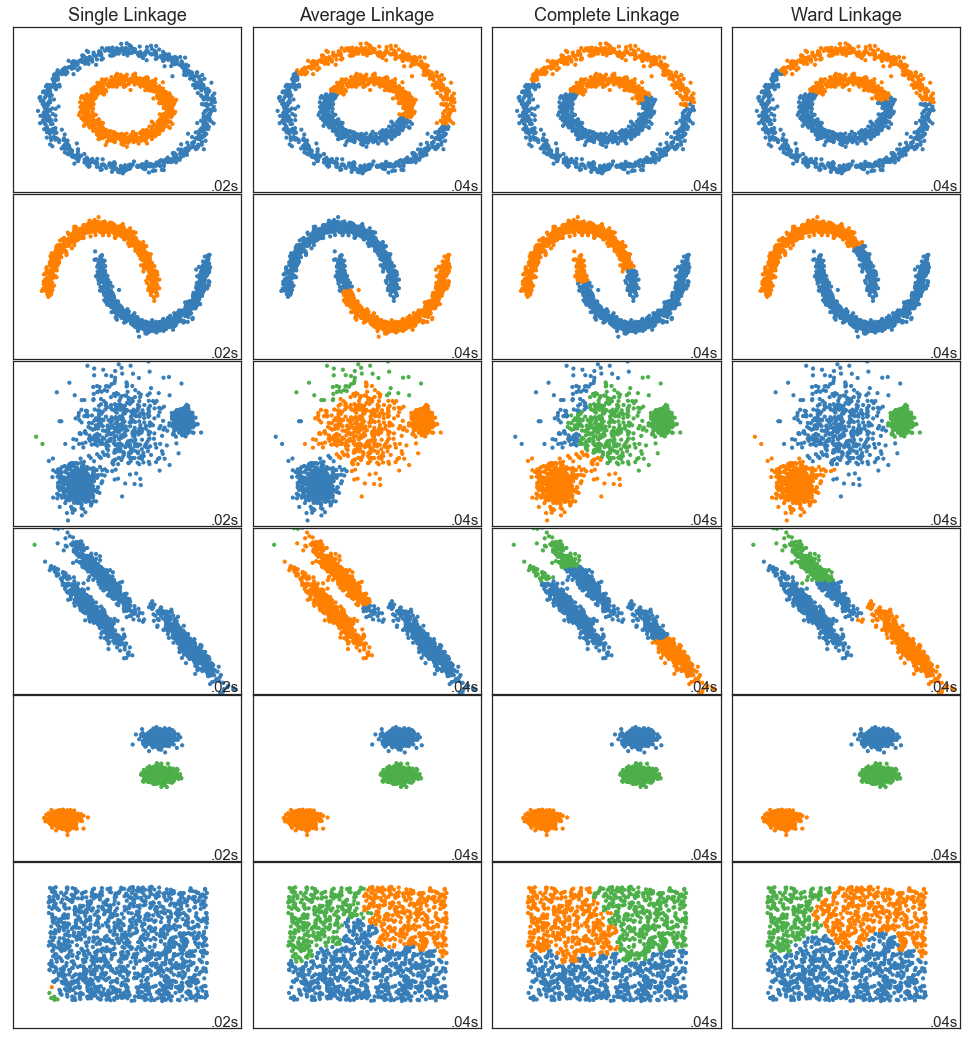

In [7]:
tau.compare_linkages()

### Pros
* No assumption of a particular number of clusters (i.e. k-means)
* May correspond to meaningful taxonomies

### Cons
* Once a decision is made to combine two clusters, it can’t be undone
* Too slow for large data sets, O(𝑛2 log(𝑛))

In [3]:
# Kita akan menggunakan data yang sama dengan EDA-03
df = sns.load_dataset("iris")
X = df[['sepal_length','sepal_width','petal_length','petal_width']].values
C = df['species'].values
print(X.shape)
df.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Hierarchical http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
hierarchical = cluster.AgglomerativeClustering(n_clusters=3, linkage='average', affinity = 'euclidean')
hierarchical.fit(X) # Lambat .... dan menggunakan banyak memori O(N^2 log(N))
C_h = hierarchical.labels_.astype(np.int)
C_h[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

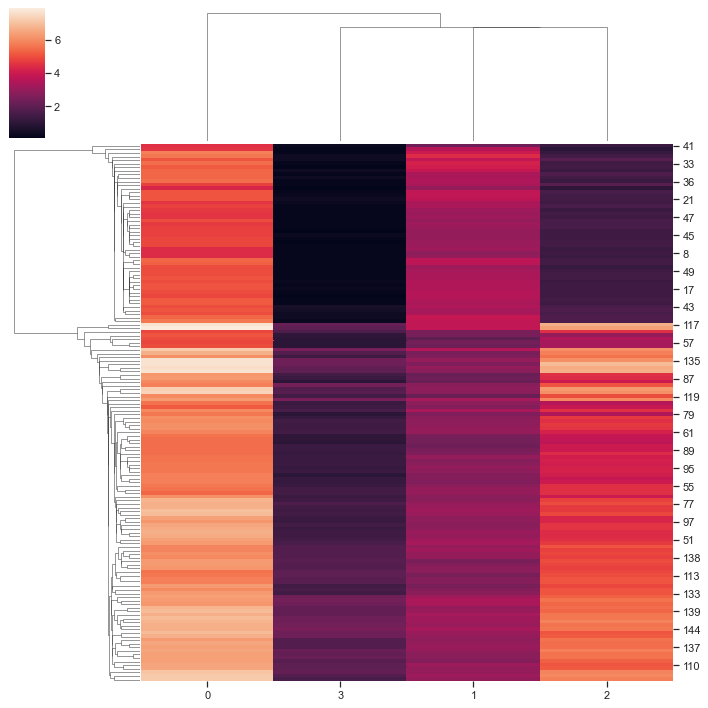

In [9]:
# Dendogram Example
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
g = sns.clustermap(X, method="single", metric="euclidean")

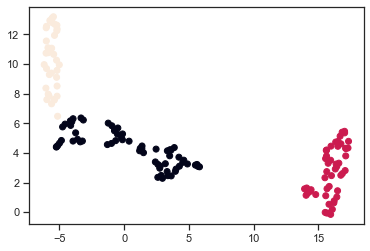

In [10]:
# Scatter Plot of the hierarchical clustering results
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_h)
plt.show()

# Evaluasi Hierarchical Clustering?

* Silhoutte Coefficient, Dunn index, or Davies–Bouldin index
* Domain knowledge - interpretability
* External Evaluation

### Read more here: https://www.ims.uni-stuttgart.de/document/team/schulte/theses/phd/algorithm.pdf

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

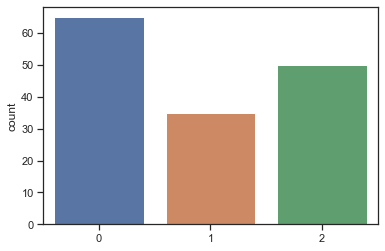

In [14]:
# Spectral : http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

spectral = cluster.SpectralClustering(n_clusters=3)
spectral.fit(X)
C_spec = spectral.labels_.astype(np.int)
sns.countplot(C_spec)
C_spec[:10]

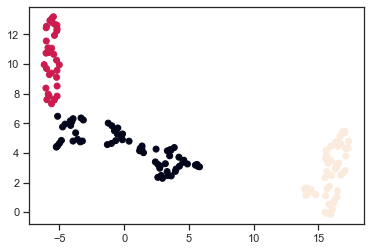

In [15]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_spec)
plt.show()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

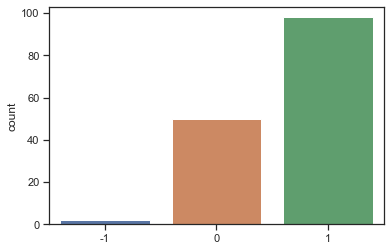

In [30]:
# DBSCAN http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
# tidak membutuhkan input parameter k!!!... sangat bermanfaat untuk clustering data yang besar
dbscan = cluster.DBSCAN(eps=0.8, min_samples=5, metric='euclidean')
dbscan.fit(X)
C_db = dbscan.labels_.astype(np.int)
sns.countplot(C_db)
C_db[:10]
# apa makna cluster label -1?

In [31]:
sum([1 for i in C_db if i==-1])

2

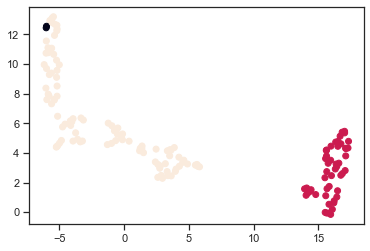

In [32]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_db)
plt.show()

In [18]:
try:
    # Should work in Google Colab
    !wget https://raw.githubusercontent.com/christopherjenness/DBCV/master/DBCV/DBCV.py
except:
    pass # Download manually on windows

import dbcv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
dbcv.DBCV(X, C_db)

-0.09914623310743173

## Pelajari Studi Kasus Berikut (Customer Segmentation):
## http://www.data-mania.com/blog/customer-profiling-and-segmentation-in-python/